# Pairs Trading
### Comparing returns of pairs trading strategy using derivatives (stock options) and purchasing the underlying
### Long Pair (NFLX, VOO)

In [26]:
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from datetime import datetime

In [109]:
# Getting Data from 6 years back
# I will use the most recent 1 year to determine how well I would have done if I follow the efficient frontier.
# The market is open 252 times in a given year.
# I will get the adjusted close as my main data.

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2022, 11, 30), end=datetime(2023, 11, 30)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["AAPL", "GOOG", "BRK-B", "MSFT", "IBM", "LMT", "NFLX", "DIS", "AMD", "WOOF", "UBER", "UBS", "BABA", "PFE", "MRNA", "VOO"] 
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,AAPL,GOOG,BRK-B,MSFT,IBM,LMT,NFLX,DIS,AMD,WOOF,UBER,UBS,BABA,PFE,MRNA,VOO
Date,,,,,,,,,,,,,,,,
2023-11-22,191.309998,140.020004,361.799988,377.850006,155.130005,447.211853,478.000000,95.070000,122.510002,3.87,55.369999,26.090000,78.959999,30.320000,78.169998,418.140015
2023-11-24,189.970001,138.220001,362.679993,377.429993,155.179993,448.810486,479.559998,96.059998,122.309998,4.00,55.320000,26.330000,78.489998,30.500000,78.519997,418.369995
2023-11-27,189.789993,138.050003,361.339996,378.609985,155.570007,442.336609,479.170013,95.169998,122.650002,3.76,56.060001,26.180000,77.529999,30.139999,77.720001,417.640015
2023-11-28,190.399994,138.619995,360.049988,382.700012,155.649994,445.096924,479.000000,92.500000,122.010002,3.84,56.209999,26.299999,76.739998,29.690001,78.180000,418.049988
2023-11-29,189.369995,136.399994,358.690002,378.850006,156.410004,441.860016,477.190002,92.500000,123.849998,2.73,56.400002,27.350000,74.669998,30.080000,79.010002,417.779999


In [110]:
corr_matrix = d.corr()
corr_matrix

,AAPL,GOOG,BRK-B,MSFT,IBM,LMT,NFLX,DIS,AMD,WOOF,UBER,UBS,BABA,PFE,MRNA,VOO
AAPL,1.000000,0.866682,0.791736,0.950323,0.294096,-0.412667,0.846860,-0.475349,0.937947,-0.564814,0.884114,0.545389,-0.443863,-0.818899,-0.811814,0.926718
GOOG,0.866682,1.000000,0.904339,0.912724,0.556085,-0.666246,0.812291,-0.652283,0.848844,-0.820234,0.910291,0.767802,-0.433188,-0.848472,-0.873112,0.896238
BRK-B,0.791736,0.904339,1.000000,0.830880,0.689505,-0.643352,0.826151,-0.645188,0.715041,-0.765888,0.894787,0.806151,-0.309704,-0.749308,-0.804041,0.917923
MSFT,0.950323,0.912724,0.830880,1.000000,0.438037,-0.476361,0.868329,-0.554367,0.928484,-0.713635,0.925037,0.630170,-0.534692,-0.861081,-0.886549,0.907198
IBM,0.294096,0.556085,0.689505,0.438037,1.000000,-0.446826,0.587937,-0.492518,0.277711,-0.685527,0.585772,0.692539,-0.073781,-0.320861,-0.446104,0.554412
LMT,-0.412667,-0.666246,-0.643352,-0.476361,-0.446826,1.000000,-0.457355,0.502932,-0.407002,0.610562,-0.609531,-0.625002,0.119183,0.581835,0.523854,-0.504046
NFLX,0.846860,0.812291,0.826151,0.868329,0.587937,-0.457355,1.000000,-0.433746,0.835687,-0.581974,0.891223,0.641321,-0.185308,-0.708070,-0.723233,0.926801
DIS,-0.475349,-0.652283,-0.645188,-0.554367,-0.492518,0.502932,-0.433746,1.000000,-0.447563,0.742946,-0.531800,-0.433311,0.521134,0.484756,0.609997,-0.488187
AMD,0.937947,0.848844,0.715041,0.928484,0.277711,-0.407002,0.835687,-0.447563,1.000000,-0.557691,0.846203,0.497409,-0.449284,-0.789746,-0.787485,0.859939
WOOF,-0.564814,-0.820234,-0.765888,-0.713635,-0.685527,0.610562,-0.581974,0.742946,-0.557691,1.000000,-0.750661,-0.831684,0.497477,0.773507,0.831900,-0.626985


<Axes: >

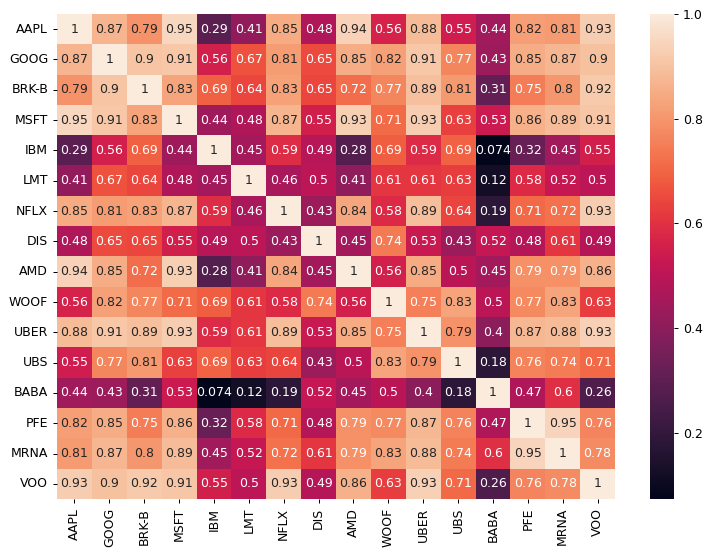

In [111]:
figure(figsize=(10, 7), dpi=90)
sn.heatmap(np.absolute(corr_matrix), annot = True)

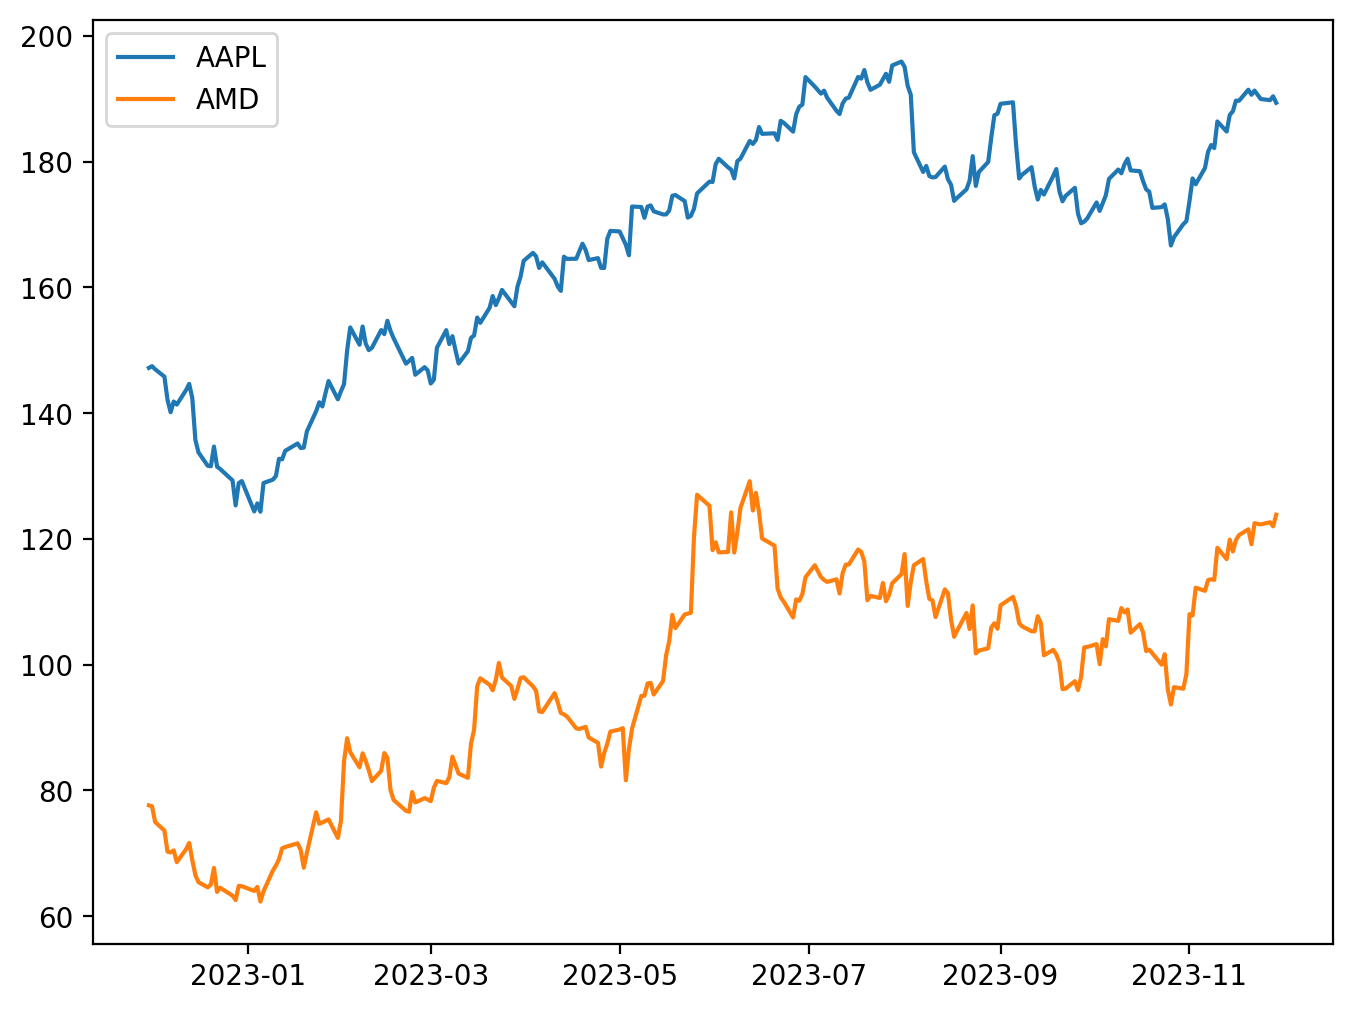

In [239]:
figure(figsize=(8, 6), dpi=200)
AAPL = d['AAPL'] 
AMD = d['AMD'] 
plt.plot(AAPL, label = "AAPL")
plt.plot(AMD, label = "AMD")
plt.legend()

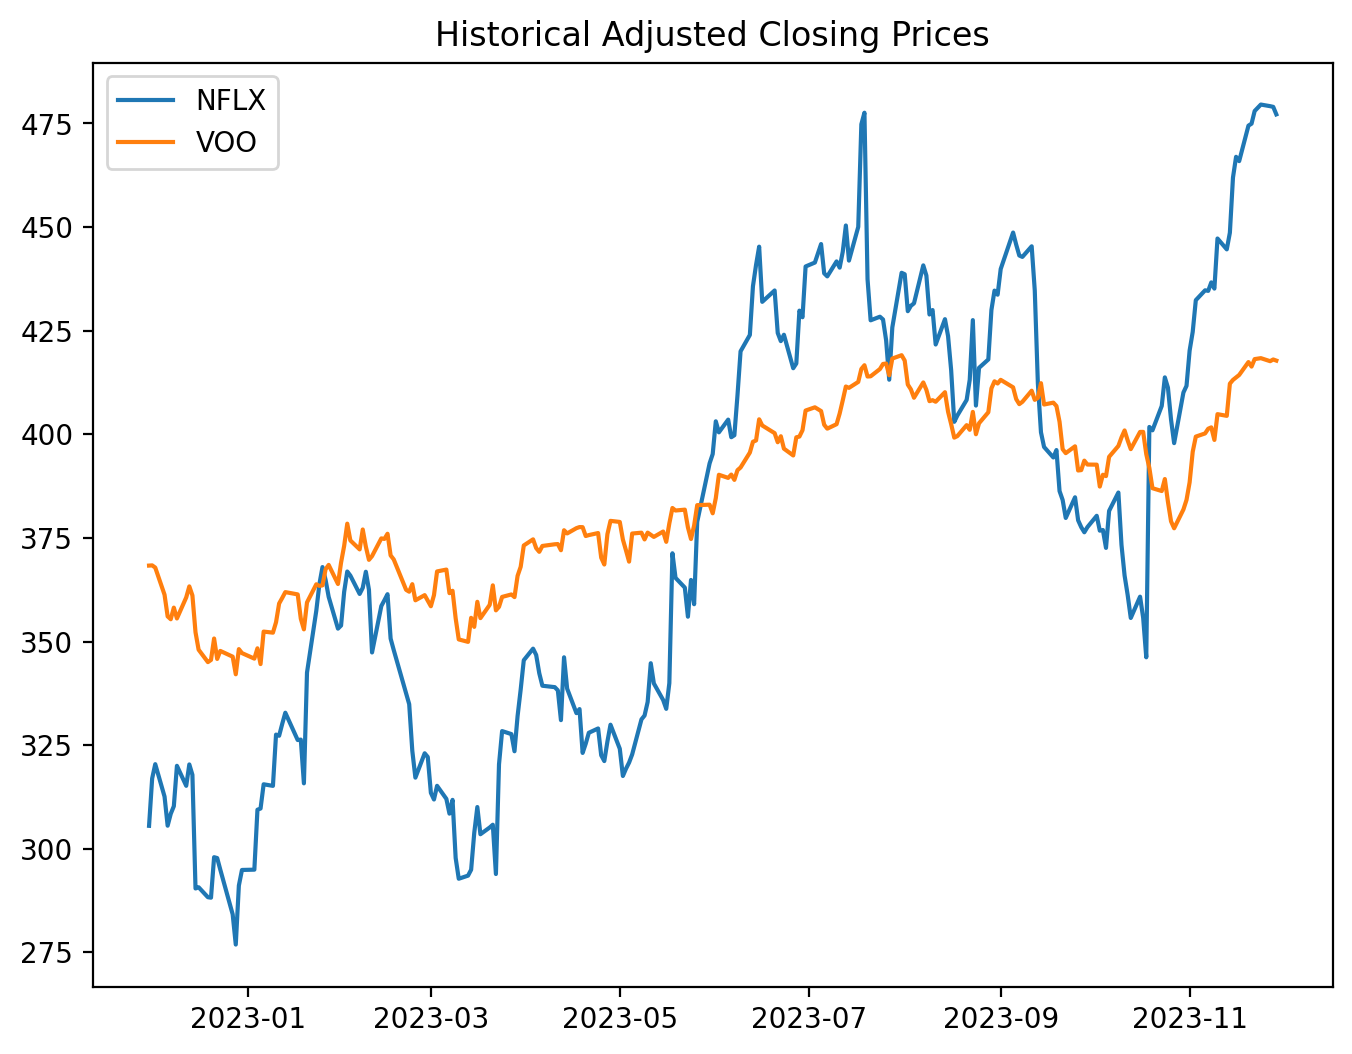

In [117]:
figure(figsize=(8, 6), dpi=200)
NFLX = d['NFLX']
VOO = d['VOO']
plt.plot(NFLX, label = "NFLX")
plt.plot(VOO, label = "VOO")
plt.title('Historical Adjusted Closing Prices')
plt.legend()

Text(0.5, 1.0, 'Spread between NFLX and VOO')

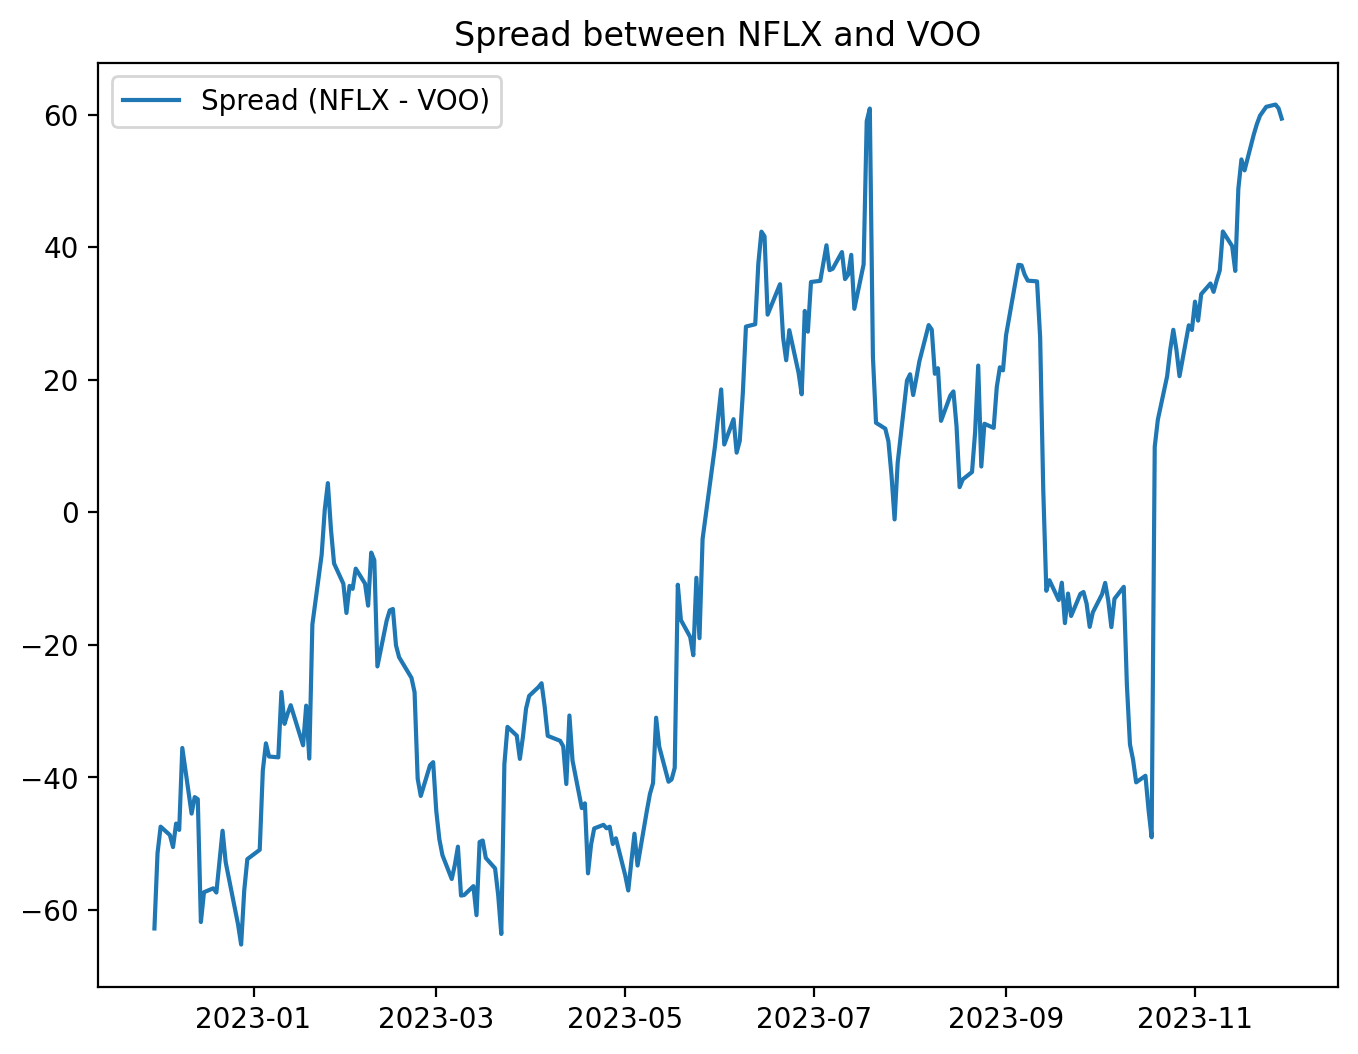

In [118]:
# plot the spread
figure(figsize=(8, 6), dpi=200)
plt.plot(NFLX - VOO, label = 'Spread (NFLX - VOO)')
plt.legend()
plt.title("Spread between NFLX and VOO")

In [119]:
# Check out the cointegration value: Null hyp. = no cointegration
import statsmodels.tsa.stattools as ts 
result = ts.coint(NFLX, VOO)

In [120]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.023326185558212666


In [126]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for Berkshire Hathaway and Microsoft
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
# ADF for Berkshire Hathaway Class B
NFLX_ADF = adfuller(NFLX)
print('P value for the Augmented Dickey-Fuller Test is', NFLX_ADF[1])
VOO_ADF = adfuller(VOO)
print('P value for the Augmented Dickey-Fuller Test is', VOO_ADF[1])
Spread_ADF = adfuller(NFLX - VOO)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(NFLX / VOO)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 0.7666046890663136
P value for the Augmented Dickey-Fuller Test is 0.8132118713292369
P value for the Augmented Dickey-Fuller Test is 0.4752379781330189
P value for the Augmented Dickey-Fuller Test is 0.3924195543930551


Text(0.5, 1.0, 'Price Ratio between NFLX and VOO')

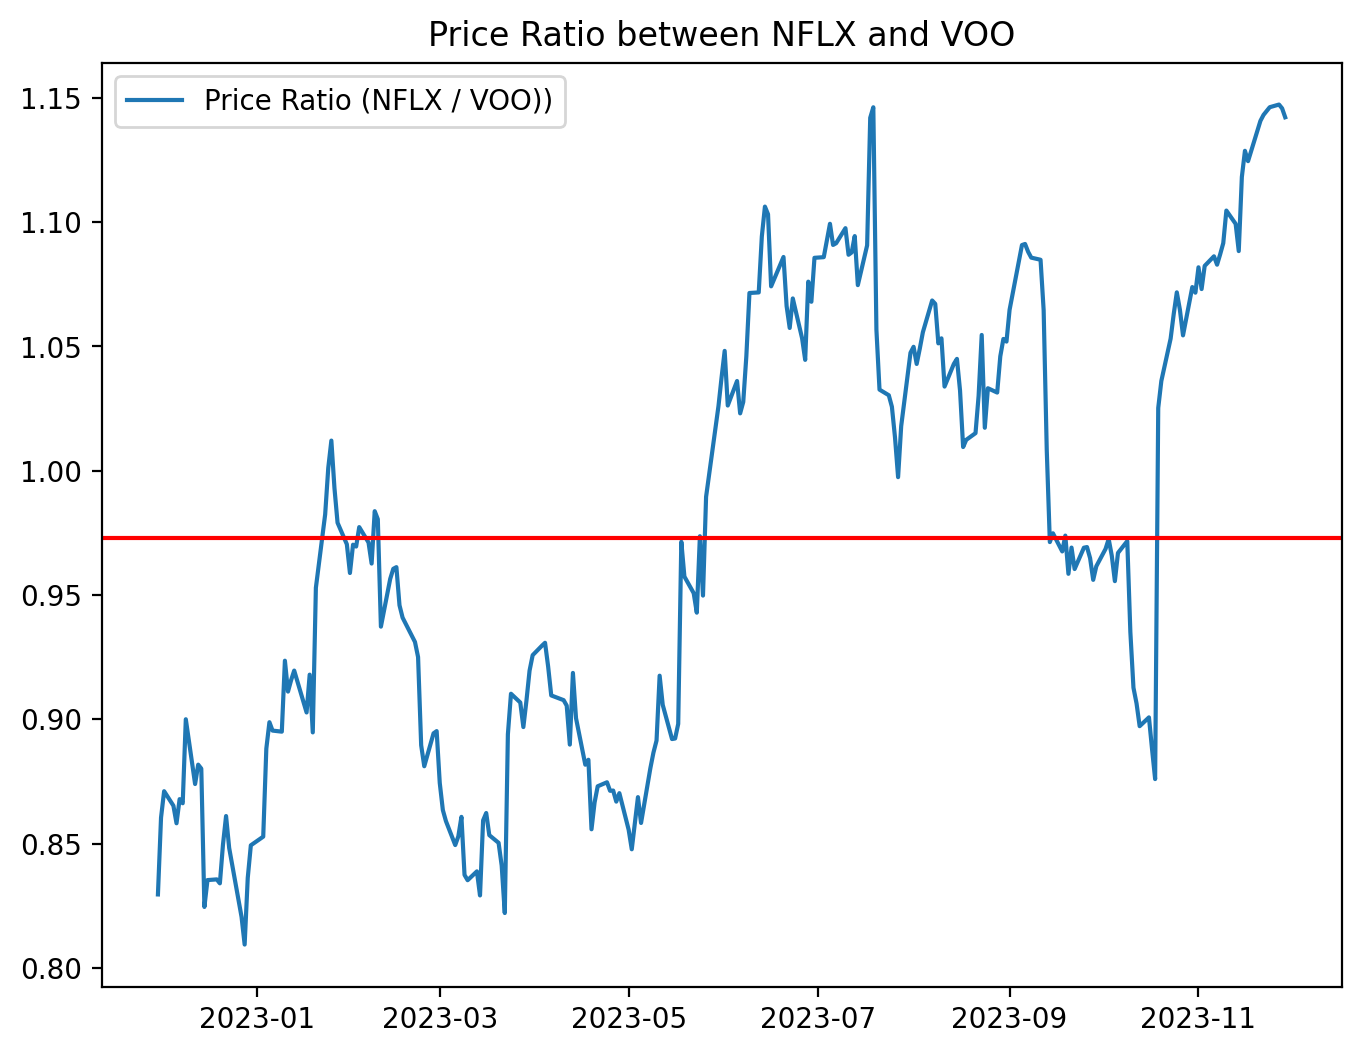

In [434]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(8, 6), dpi=200)
ratio = NFLX / VOO
plt.plot(ratio, label = 'Price Ratio (NFLX / VOO))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between NFLX and VOO")

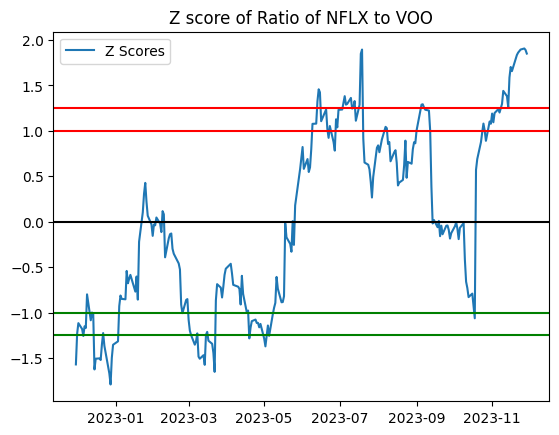

In [435]:
# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a 
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
#figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of NFLX to VOO')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (BRK_B to MSFT).

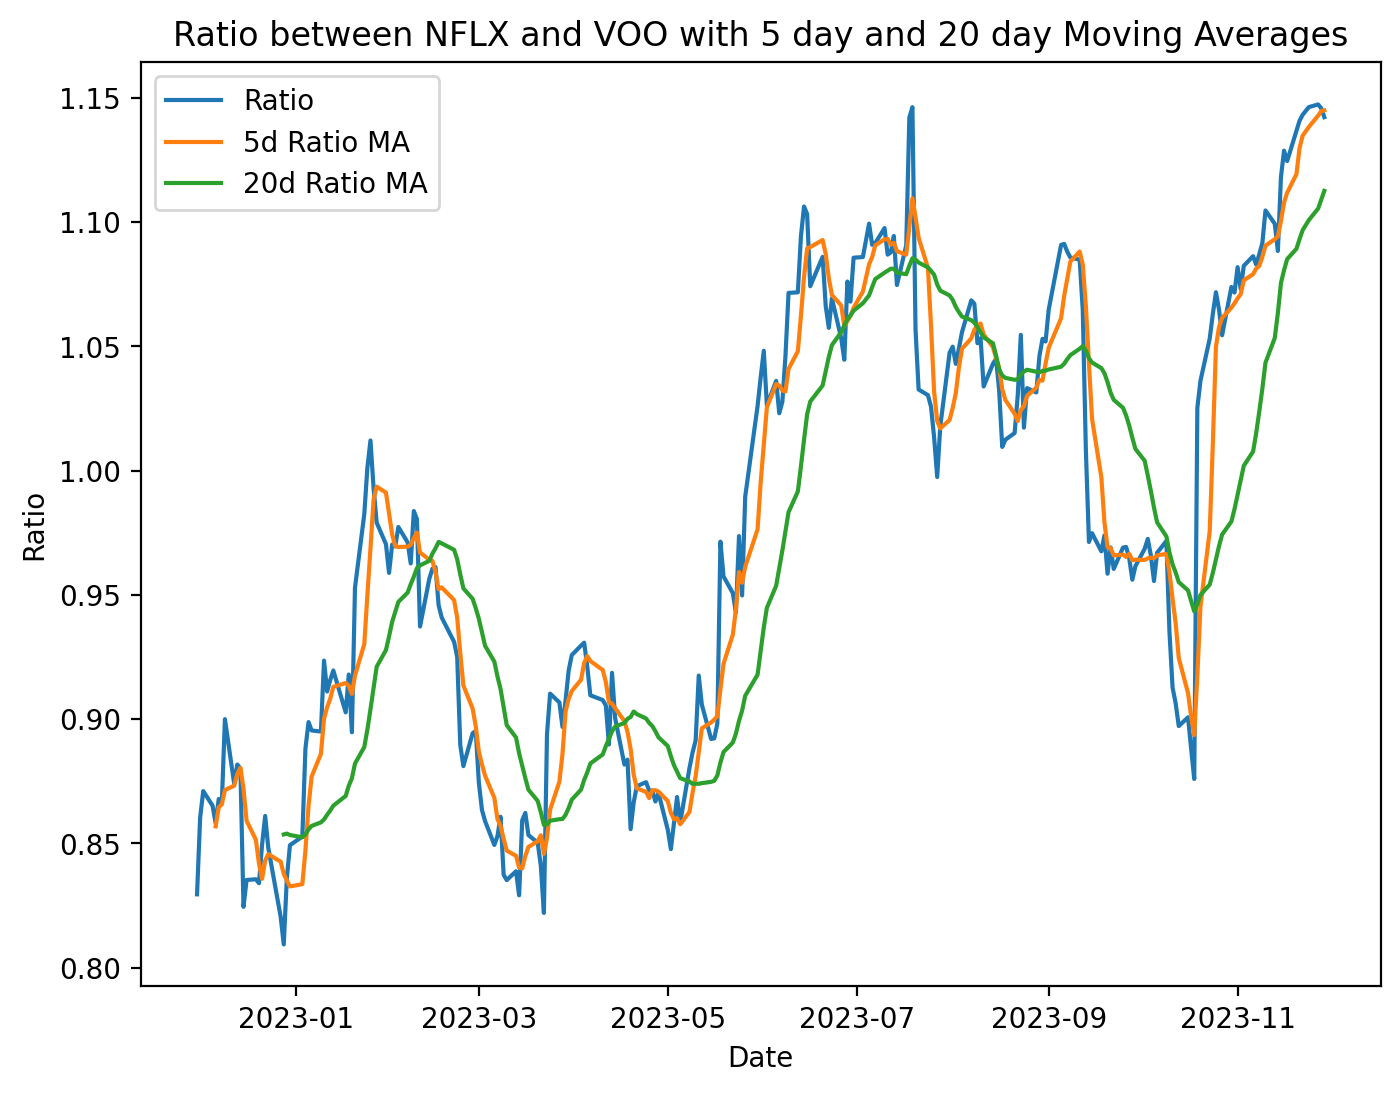

In [241]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between NFLX and VOO with 5 day and 20 day Moving Averages')
plt.show()

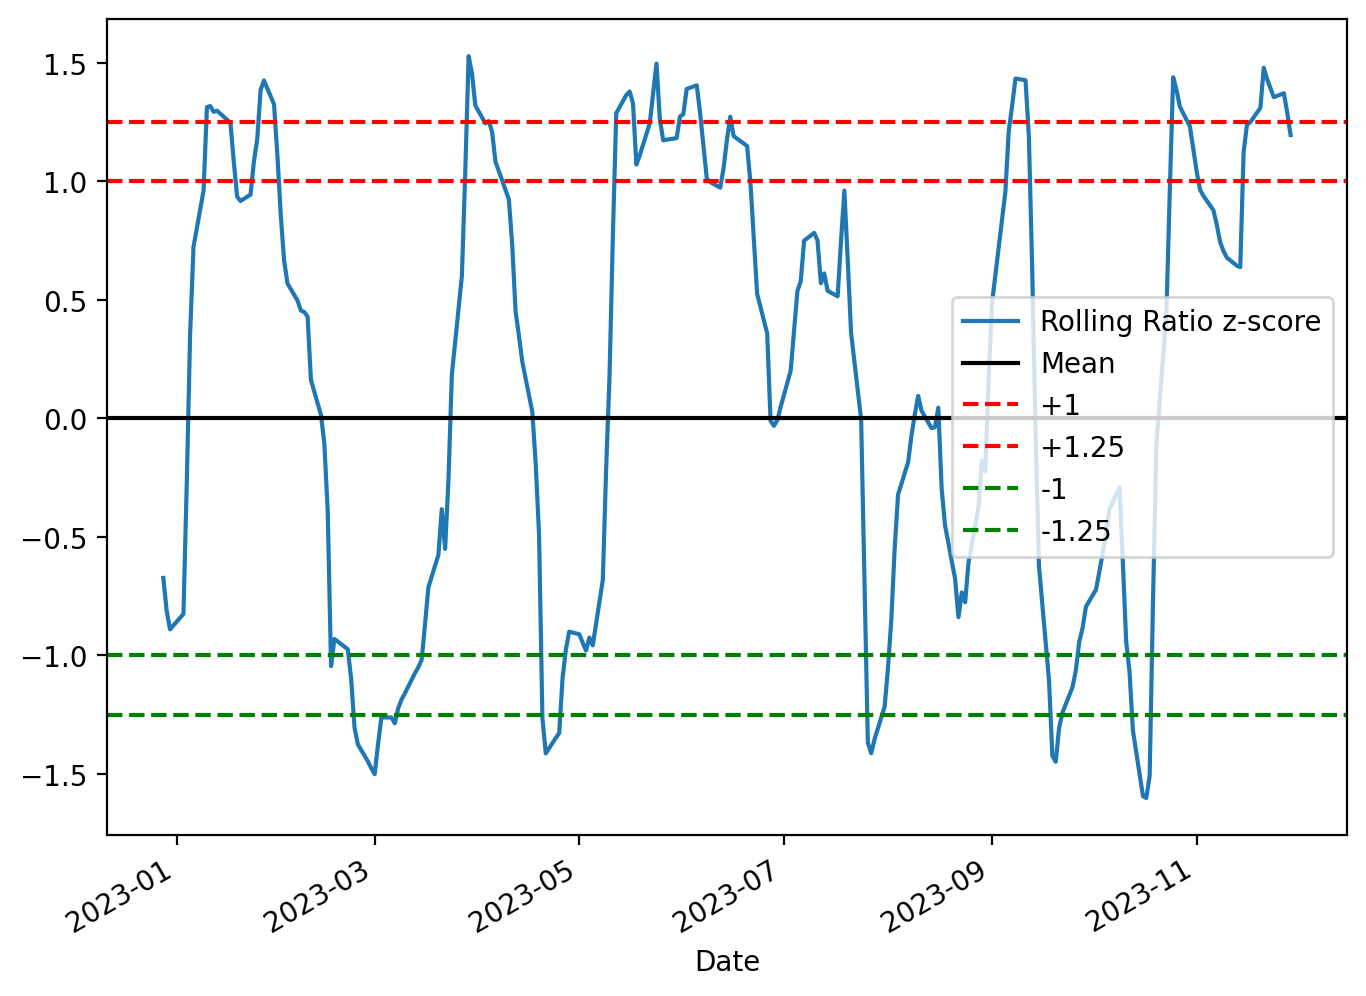

In [130]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

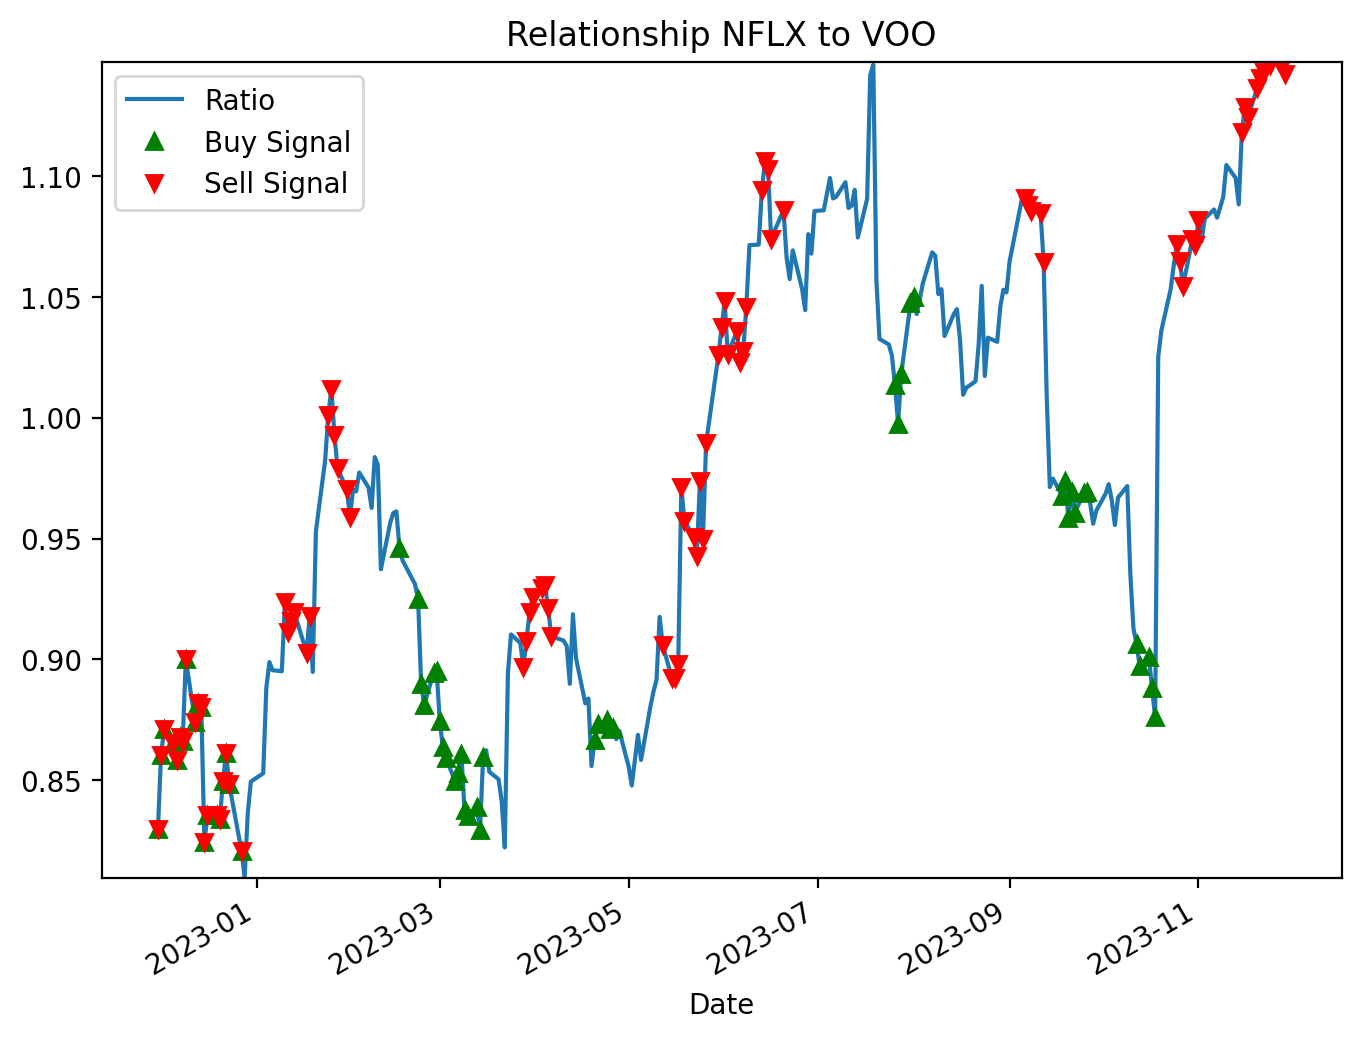

In [242]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='v')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship NFLX to VOO')
plt.show()

In [368]:
entry_index = 0
entry_date = 0
exit_index = 20
exit_date = 0
buy_pos = []
buy_prices_NFLX = []
buy_prices_VOO = []

print("LONG POSITIONS:")
print()

while exit_index < buy.shape[0] - 1:
    for i in range(exit_index, buy.shape[0]):
        if buy.iloc[i] != 0:
            entry_date = buy.index[i]
            entry_index = i
            print("ENTER TRADE AT:", entry_date, "VOO PRICE =", VOO.loc[entry_date], 
                  "NFLX PRICE =", NFLX.loc[entry_date])
            for j in range(i, zscore_20_5.shape[0] - 1):
                if zscore_20_5.iloc[j] < 0 and zscore_20_5.iloc[j+1] > 0:
                    exit_date = zscore_20_5.index[j]
                    exit_index = j
                    print("EXIT TRADE AT:", exit_date, "VOO PRICE =", VOO.loc[exit_date],
                          "NFLX PRICE =", NFLX.loc[exit_date])
                    print()
                    buy_pos += [(entry_date, exit_date)]
                    buy_prices_VOO += [(VOO.loc[entry_date], VOO.loc[exit_date])]
                    buy_prices_NFLX += [(NFLX.loc[entry_date], NFLX.loc[exit_date])]
                    break
                else:
                    if j == zscore_20_5.shape[0] - 2:
                        print("No exit due to insufficient data")
                        exit_index = buy.shape[0] - 1
                        break
            break
        else:
            exit_index = i

entry_index = 0
entry_date = 0
exit_index = 20
exit_date = 0  
sell_pos = []
sell_prices_VOO = []
sell_prices_NFLX = []
            
print("SHORT POSITIONS:")
print()

while exit_index < sell.shape[0] - 1:
    for i in range(exit_index, sell.shape[0]):
        if sell.iloc[i] != 0:
            entry_date = sell.index[i]
            entry_index = i
            print("ENTER TRADE AT:", entry_date, "VOO PRICE =", VOO.loc[entry_date], 
                  "NFLX PRICE =", NFLX.loc[entry_date])
            for j in range(i, zscore_20_5.shape[0] - 1):
                if zscore_20_5.iloc[j] > 0 and zscore_20_5.iloc[j+1] < 0:
                    exit_date = zscore_20_5.index[j]
                    exit_index = j
                    print("EXIT TRADE AT:", exit_date, "VOO PRICE =", VOO.loc[exit_date],
                          "NFLX PRICE =", NFLX.loc[exit_date])
                    print()
                    sell_pos += [(entry_date, exit_date)]
                    sell_prices_VOO += [(VOO.loc[entry_date], VOO.loc[exit_date])]
                    sell_prices_NFLX += [(NFLX.loc[entry_date], NFLX.loc[exit_date])]
                    break
                else:
                    if j == zscore_20_5.shape[0] - 2:
                        print("No exit due to insufficient data")
                        exit_index = sell.shape[0] - 1
                        break
            break
        else:
            exit_index = i

LONG POSITIONS:

ENTER TRADE AT: 2023-02-16 00:00:00 VOO PRICE = 370.774169921875 NFLX PRICE = 350.7099914550781
EXIT TRADE AT: 2023-03-23 00:00:00 VOO PRICE = 358.37188720703125 NFLX PRICE = 320.3699951171875

ENTER TRADE AT: 2023-04-20 00:00:00 VOO PRICE = 375.456298828125 NFLX PRICE = 325.3500061035156
EXIT TRADE AT: 2023-05-09 00:00:00 VOO PRICE = 374.6327209472656 NFLX PRICE = 332.1400146484375

ENTER TRADE AT: 2023-07-26 00:00:00 VOO PRICE = 417.06890869140625 NFLX PRICE = 422.6700134277344
EXIT TRADE AT: 2023-08-08 00:00:00 VOO PRICE = 410.7231140136719 NFLX PRICE = 438.29998779296875

ENTER TRADE AT: 2023-09-18 00:00:00 VOO PRICE = 407.6348876953125 NFLX PRICE = 394.3999938964844
EXIT TRADE AT: 2023-10-20 00:00:00 VOO PRICE = 386.989990234375 NFLX PRICE = 400.9599914550781

SHORT POSITIONS:

ENTER TRADE AT: 2023-01-10 00:00:00 VOO PRICE = 354.6462707519531 NFLX PRICE = 327.5400085449219
EXIT TRADE AT: 2023-02-13 00:00:00 VOO PRICE = 374.88519287109375 NFLX PRICE = 358.570007324

In [369]:
buy_pos

[(Timestamp('2023-02-16 00:00:00'), Timestamp('2023-03-23 00:00:00')),
 (Timestamp('2023-04-20 00:00:00'), Timestamp('2023-05-09 00:00:00')),
 (Timestamp('2023-07-26 00:00:00'), Timestamp('2023-08-08 00:00:00')),
 (Timestamp('2023-09-18 00:00:00'), Timestamp('2023-10-20 00:00:00'))]

In [235]:
sell_pos

[(Timestamp('2023-01-10 00:00:00'), Timestamp('2023-02-13 00:00:00')),
 (Timestamp('2023-03-28 00:00:00'), Timestamp('2023-04-17 00:00:00')),
 (Timestamp('2023-05-12 00:00:00'), Timestamp('2023-06-26 00:00:00')),
 (Timestamp('2023-09-06 00:00:00'), Timestamp('2023-09-13 00:00:00'))]

In [370]:
from scipy.stats import norm
import math

class BSMOption:
    """ a data type that encapsulates data required to do Black-Scholes 
        option pricing formula """
        
    def __init__(self, s, x, t, sig, rf, div):
        """ constructor that initializes the attributes in every
            BSMOption object. """
            
        self.current_price = s
        self.strike_price = x
        self.maturity = t
        self.sigma = sig
        self.rate = rf
        self.dividend = div
        
    def __repr__(self):
        """ returns a formatted string representing the BSMOption object. """
        
        string = "s = $" + f"{self.current_price:,.2f}" + ", "
        string += "x = $" + f"{self.strike_price:,.2f}" + ", "
        string += "t = " + f"{self.maturity:,.2f} (years)" + ", "
        string += "sigma = " + f"{self.sigma:,.3f}" + ", "
        string += "rf = " + f"{self.rate:,.3f}" + ", "
        string += "div = " + f"{self.dividend:,.2f}"
        
        return string
    
    def d1(self):
        """ calculates the value of the d1 factor required by the 
            Black-Scholes formula. """
        
        # log of current price over strike price
        left = math.log(self.current_price / self.strike_price)
        
        # (rf - div + (0.5sigma ^ 2)) * maturity
        right = (self.rate - self.dividend + 0.5 * (self.sigma ** 2)) \
            * self.maturity
        
        # sigma * square root of maturity
        denom = self.sigma * (self.maturity ** 0.5)
        
        return (left + right) / denom
    
    def d2(self):
        """ calculates the value of the d2 factor required by the 
            Black-Scholes formula. """
        
        return self.d1() - (self.sigma * (self.maturity ** 0.5))
    
    def nd1(self):
        """ calculates the normal CDF of d1. """
        
        return norm.cdf(self.d1())
        
    def nd2(self):
        """ calculates the normal CDF of d2. """
        
        return norm.cdf(self.d2())
    
    def value(self):
        """ calculates the value of the option. """
        
        print("Cannot calculate value for base class BSMOption.")
        
        return 0
    
    def delta(self):
        """ calculates the delta of the option. """
        
        print("Cannot calculate delta for base class BSMOption.")
        
        return 0

class BSMEuroCallOption(BSMOption):
    """ a data type that encapsulates data required to do Black-Scholes 
        option pricing algorithm for European-style call options. """
    
    def __init__(self, s, x, t, sig, rf, div):
        """ constructor that initializes the attributes in every
            BSMEuroCallOption object. """
            
        super().__init__(s, x, t, sig, rf, div)

    def __repr__(self):
        """ returns a formatted string representing the BSMEuroCallOption
            object. """
        
        string = "BSMEuroCallOption, "
        string += "value = $" + f"{self.value():,.2f}" + ", "
        string += '\n'
        string += "parameters = ("
        string += super().__repr__()
        string += ")"

        return string
    
    def value(self):
        """ calculates the value of the option. """
        
        # left side of equation
        left = self.current_price * \
            math.exp(- self.dividend * self.maturity) * self.nd1()
        
        # right side of equation
        right = self.strike_price * \
            math.exp(- self.rate * self.maturity) * self.nd2()
    
        return left - right
    
    def delta(self):
        """ calculates the delta of the option. """
        
        return math.exp(- self.dividend * self.maturity) * self.nd1()
    
class BSMEuroPutOption(BSMOption):
    """ a data type that encapsulates data required to do Black-Scholes 
        option pricing algorithm for European-style put options. """
     
    def __init__(self, s, x, t, sig, rf, div):
        """ constructor that initializes the attributes in every
            BSMEuroPutOption object. """
            
        super().__init__(s, x, t, sig, rf, div)
        
    def __repr__(self):
        """ returns a formatted string representing the BSMEuroCallOption
            object. """
        
        string = "BSMEuroCallOption, "
        string += "value = $" + f"{self.value():,.2f}" + ", "
        string += '\n'
        string += "parameters = ("
        string += super().__repr__()
        string += ")"

        return string
    
    def value(self):
        """ calculates the value of the option. """   
        
        # left side of equation
        left = self.strike_price * \
            math.exp(- self.rate * self.maturity) * (1 - self.nd2())
            
        # right side of equation
        right = self.current_price * \
            math.exp(- self.dividend * self.maturity) * (1 - self.nd1())
    
        return left - right
    
    def delta(self):
        """ calculates the delta of the option. """
        
        return - math.exp(- self.dividend * self.maturity) * (1 - self.nd1())

In [371]:
# Getting 3 month treasury rate for positions
rates = pd.read_csv('rates.csv')
rates.set_index('Date', inplace=True)

In [372]:
buy_pos_rates = []
for i in buy_pos:
    buy_pos_rates.append(rates.loc[f'{i[0].month:02d}' + '/' + f'{i[0].day:02d}' + '/' 
                                   + f'{i[0].year:04d}']['Price'])
buy_pos_rates = np.array(buy_pos_rates)
buy_pos_rates = buy_pos_rates / 100
buy_pos_rates

array([0.04801, 0.05101, 0.05438, 0.05465])

In [373]:
sell_pos_rates = []
for i in sell_pos:
    sell_pos_rates.append(rates.loc[f'{i[0].month:02d}' + '/' + f'{i[0].day:02d}' + '/' 
                                   + f'{i[0].year:04d}']['Price'])
sell_pos_rates = np.array(sell_pos_rates)
sell_pos_rates = sell_pos_rates / 100
sell_pos_rates

array([0.04688, 0.04771, 0.05216, 0.05472])

In [349]:
NFLX_std = 0.02457 * np.sqrt(90)
VOO_std = 0.00863 * np.sqrt(90)

In [471]:
VOO_call_vals_long = []
NFLX_put_vals_long = []
for i in range(len(buy_pos)):
    call = BSMEuroCallOption(NFLX[buy_pos[i][0]], NFLX[buy_pos[i][0]], 0.25, NFLX_std, buy_pos_rates[i], 0.00)
    put = BSMEuroPutOption(VOO[buy_pos[i][0]], VOO[buy_pos[i][0]], 0.25, VOO_std, buy_pos_rates[i], 0.00)
    VOO_call_vals_long += [put.value()]
    NFLX_put_vals_long += [call.value()]
    print("call.value() =", call.value())
    print("put.value() =", put.value())

call.value() = 18.377678842324684
put.value() = 4.063580365698158
call.value() = 17.17389330905783
put.value() = 4.006699567358567
call.value() = 22.494411101395514
put.value() = 4.3184464289880395
call.value() = 21.003631585934727
put.value() = 4.210521755329069


In [480]:
sum(NFLX_put_vals_long)

79.04961483871276

In [481]:
sum(VOO_call_vals_long)

16.599248117373833

In [479]:
VOO_put_vals_short = []
NFLX_call_vals_short = []
for i in range(len(sell_pos)):
    call = BSMEuroCallOption(VOO[sell_pos[i][0]], VOO[sell_pos[i][0]], 0.25, VOO_std, sell_pos_rates[i], 0.00)
    put = BSMEuroPutOption(NFLX[sell_pos[i][0]], NFLX[sell_pos[i][0]], 0.25, NFLX_std, sell_pos_rates[i], 0.00)
    NFLX_call_vals_short += [put.value()]
    VOO_put_vals_short += [call.value()]
    print("call.value() =", call.value())
    print("put.value() =", put.value())

call.value() = 8.058009615472827
put.value() = 13.29987314557053
call.value() = 8.240837979298817
put.value() = 13.104610647083405
call.value() = 8.82479614281479
put.value() = 13.588255564600388
call.value() = 9.76682871275247
put.value() = 17.686343351442133


In [482]:
sum(NFLX_call_vals_short)

57.679082708696455

In [484]:
sum(VOO_put_vals_short)

34.890472450338905

In [377]:
buy_prices_VOO

[(370.774169921875, 358.37188720703125),
 (375.456298828125, 374.6327209472656),
 (417.06890869140625, 410.7231140136719),
 (407.6348876953125, 386.989990234375)]

In [378]:
buy_prices_NFLX

[(350.7099914550781, 320.3699951171875),
 (325.3500061035156, 332.1400146484375),
 (422.6700134277344, 438.29998779296875),
 (394.3999938964844, 400.9599914550781)]

In [379]:
sell_prices_VOO

[(354.6462707519531, 374.88519287109375),
 (360.7206726074219, 377.35162353515625),
 (375.2380065917969, 394.89544677734375),
 (408.4916076660156, 408.7904968261719)]

In [380]:
sell_prices_NFLX

[(327.5400085449219, 358.57000732421875),
 (323.5199890136719, 332.7200012207031),
 (339.8900146484375, 415.94000244140625),
 (445.760009765625, 412.239990234375)]

### Calculate and compare returns

In [461]:
# Long positions
NFLX_stock_returns_long = []
for i in buy_prices_NFLX:
    NFLX_stock_returns_long += [(i[1] - i[0])]

VOO_stock_returns_long = []
for i in buy_prices_VOO:
    VOO_stock_returns_long += [(i[0] - i[1])]

In [462]:
NFLX_stock_returns_long

[-30.339996337890625, 6.790008544921875, 15.629974365234375, 6.55999755859375]

In [463]:
VOO_stock_returns_long

[12.40228271484375, 0.823577880859375, 6.345794677734375, 20.6448974609375]

In [464]:
# Short positions
NFLX_stock_returns_short = []
for i in sell_prices_NFLX:
    NFLX_stock_returns_short += [(i[0] - i[1])]

VOO_stock_returns_short = []
for i in sell_prices_VOO:
    VOO_stock_returns_short += [(i[1] - i[0])]

In [465]:
NFLX_stock_returns_short

[-31.029998779296875, -9.20001220703125, -76.04998779296875, 33.52001953125]

In [466]:
VOO_stock_returns_short

[20.238922119140625, 16.630950927734375, 19.657440185546875, 0.29888916015625]

In [467]:
initial = 1000
final = initial + sum(NFLX_stock_returns_long) + sum(VOO_stock_returns_long) + \
        sum(NFLX_stock_returns_short) + sum(VOO_stock_returns_short)
final

1012.9227600097656

In [472]:
NFLX_returns_options = []

for i in range(len(buy_prices_NFLX)):
    NFLX_returns_options += [max(-NFLX_put_vals_long[i], buy_prices_NFLX[i][1] - NFLX_put_vals_long[i] - buy_prices_NFLX[i][0])]

for i in range(len(sell_prices_NFLX)):
    NFLX_returns_options += [max(-NFLX_call_vals_short[i], sell_prices_NFLX[i][0] - NFLX_call_vals_short[i] - sell_prices_NFLX[i][1])]
               
NFLX_returns_options

[-18.377678842324684,
 -10.383884764135928,
 -6.86443673616111,
 -14.443634027340977,
 -13.29987314557053,
 -13.104610647083405,
 -13.588255564600388,
 15.833676179807867]

In [473]:
VOO_returns_options = []

for i in range(len(buy_prices_VOO)):
    VOO_returns_options += [max(-VOO_call_vals_long[i], buy_prices_VOO[i][0] - VOO_call_vals_long[i] - buy_prices_VOO[i][1])]

for i in range(len(sell_prices_VOO)):
    VOO_returns_options += [max(-VOO_put_vals_short[i], sell_prices_VOO[i][1] - VOO_put_vals_short[i] - sell_prices_VOO[i][0])]
               
VOO_returns_options

[8.338702349145592,
 -3.1831216864991916,
 2.027348248746307,
 16.43437570560843,
 12.180912503667798,
 8.390112948435558,
 10.832644042732113,
 -9.467939552596249]

In [478]:
sum(NFLX_returns_options[:4])

-50.0696343699627

In [487]:
total_inv = sum(NFLX_put_vals_long) + sum(NFLX_call_vals_short) + sum(VOO_call_vals_long) + sum(VOO_put_vals_short)
total_earnings = sum(NFLX_returns_options) + sum(VOO_returns_options)
total_earnings / total_inv

-0.15235311865510212